# 지역 선형 임베딩 (LLE:Locally LInear Embedding) 실습

---

**Locally LInear Embedding**

데이터 포인트의 이웃 데이터 중 이웃 데이터를 K개 정하여, 해당 포인트와 K개의 이웃 데이터를 하나의 덩어리라고 가정하고 데이터를 재구성하는 개념이다.

특정 데이터 포인트보다 주변의 이웃 데이터들이 더 중요하다.

K개 정하였을 때, 데이터를 재구성 할 때 재구성 에러를 최소화 해야한다. 재구성 에러 함수가 목적 함수에 해당한다고 볼 수 있다.

전체 가중치 행렬 $\boldsymbol{\Sigma}_W$의 각 행 원소(row element)의 합은 1이 된다. ( $ \Sigma_{j} w_{ij} = 1$ )

> LLE에서는 데이터 주변의 이웃 관계를 유지하면서 새로운 공간에 투영하는 것이 중요하다. 새로운 공간에서의 데이터와 해당 데이터 포인트 주변의 이웃 K 개의 데이터 간의 거리를 최소화하는 문제와 동일하다.

수식을 함께 참고하기 위해 다른 페이지를 참조하였다: 
 
---
##### 핸즈온 머신러닝 차원 축소 - Locally Linear Embedding (LLE)
_출처: https://excelsior-cjh.tistory.com/168 [EXCELSIOR:티스토리]_

LLE는 비선형 차원 축소(NonLinear Dimensionality Reduction, NLDR) 기법으로 PCA와 달리 투영(projection)이 아닌 **매니폴드 학습(manifold learning)** 이다.

$ ϵ(W)=∑_{i=1}^n∥x_{i} − ∑_{x_j∈x_i의이웃}w_{ij}x_{j}∥^2_2 $

- 새로운 데이터에 대한 예측은 변형된 공간에서의 각 집단별 평균을 구해 가장 가까운 집단으로 구분한다. 
---
##### 귀납적(inductive) 학습 모델과 transductive 학습 모델: [Manifold Learning] IsoMap, LLE, t-SNE 설명
_출처: https://wordbe.tistory.com/entry/Manifold-Learning-IsoMap-LLE-t-SNE-%EC%84%A4%EB%AA%85_

        IsoMap, LLE, t-SNE 출력을 생각해보면, '변환된 데이터' 임을 알 수 있습니다.

        PCA나 autoencoder가 최적화된 매개변수를 출력하는 것과는 다르다는 것을 알 수 있습니다.

        따라서 t-SNE 등과 같은 알고리즘은 새로운 샘플이 입력되면 처리할 수 없습니다.

        기계학습에서는 이처럼 새로운 샘플을 처리할 능력이 없는 모델을 트랜스덕티브(transductive) 학습 모델이라고 합니다. (Vapnik, 1998) (IsoMap, LLe, t-SNE, semi-supervised 그래프 최소분할)

        반면, 새로운 샘플을 처리할 수 있는 모델 학습은 귀납적(inductive) 모델 학습이라고 합니다.

        주어진 과업이 데이터 가시화(data visulization)라면 트랜스덕티브한 모델의 결과가 더 우월합니다.

        PCA는 선형 모델이므로 비선형 구조의 데이터를 제대로 처리할 수 없으며, 오토인코더는 비선형 처리가 가능하지만 데이터의 지역적 구조를 제대로 표현하지 못하기 때문입니다.

        한편, t-SNE는 귀납적 모델로 확장이 가능합니다.(Maaten, 2009) 이러한 parametric t-SNE 기법은 RBM을 적층한 전방 신경망 구조를 채택하였고, 학습은 stacked autoencoer와 마찬가지로 층별 예비학습과 fine-tune 단계를 거칩니다. 또한 t-SNE가 사용한 목적함수를 개조해서 매니폴드의 비선형 구조를 제대로 표현합니다.

##### 10.5.2 LLE 개념을 활용하여 와인의 종류를 분류하는 모형을 만들어보자.




# Dataset import
## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
# 데이터 셋 내 피처 살펴보기
raw_wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# 피처, 타깃 데이터 지정

In [3]:
X = raw_wine.data
y = raw_wine.target

## 트레이닝, 테스트 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 1)

## 데이터 표준화

In [5]:
from sklearn.preprocessing import StandardScaler

# X 트레이닝 데이터 기준으로 std scaler fitting, Xtn Xte모두.
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# LLE fitting

LLE는 manifold 라이브러리 안에 있다.

n_components 옵션으로 변환시킬 차원 수를 정할 수 있다.

parameter를 뜯어보니 기본 k는 5로 설정되어있음을 볼 수 있었다.

In [6]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2)      # LLE 모형 설정
lle.fit(X_tn_std, y_tn)                             # 트레이닝 데이터를 넣고 적합

X_tn_lle = lle.transform(X_tn_std)                  # 각각 차원축소 시킴
X_te_lle = lle.transform(X_te_std)

##### Parameters
----------
    n_neighbors : int, default=5
        Number of neighbors to consider for each point.

    n_components : int, default=2
        Number of coordinates for the manifold.

    reg : float, default=1e-3
        Regularization constant, multiplies the trace of the local covariance
        matrix of the distances.

    eigen_solver : {'auto', 'arpack', 'dense'}, default='auto'
        The solver used to compute the eigenvectors. The available options are:

        - `'auto'` : algorithm will attempt to choose the best method for input
          data.
        - `'arpack'` : use arnoldi iteration in shift-invert mode. For this
          method, M may be a dense matrix, sparse matrix, or general linear
          operator.
        - `'dense'`  : use standard dense matrix operations for the eigenvalue
          decomposition. For this method, M must be an array or matrix type.
          This method should be avoided for large problems.

        .. warning::
           ARPACK can be unstable for some problems.  It is best to try several
           random seeds in order to check results.

    tol : float, default=1e-6
        Tolerance for 'arpack' method
        Not used if eigen_solver=='dense'.

    max_iter : int, default=100
        Maximum number of iterations for the arpack solver.
        Not used if eigen_solver=='dense'.

    method : {'standard', 'hessian', 'modified', 'ltsa'}, default='standard'

        - `standard`: use the standard locally linear embedding algorithm. see
          reference [1]_
        - `hessian`: use the Hessian eigenmap method. This method requires
          ``n_neighbors > n_components * (1 + (n_components + 1) / 2``. see
          reference [2]_
        - `modified`: use the modified locally linear embedding algorithm.
          see reference [3]_
        - `ltsa`: use local tangent space alignment algorithm. see
          reference [4]_

    hessian_tol : float, default=1e-4
        Tolerance for Hessian eigenmapping method.
        Only used if ``method == 'hessian'``.

    modified_tol : float, default=1e-12
        Tolerance for modified LLE method.
        Only used if ``method == 'modified'``.

    neighbors_algorithm : {'auto', 'brute', 'kd_tree', 'ball_tree'},                           default='auto'
        Algorithm to use for nearest neighbors search, passed to
        :class:`~sklearn.neighbors.NearestNeighbors` instance.

    random_state : int, RandomState instance, default=None
        Determines the random number generator when
        ``eigen_solver`` == 'arpack'. Pass an int for reproducible results
        across multiple function calls. See :term:`Glossary <random_state>`.

    n_jobs : int or None, default=None
        The number of parallel jobs to run.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

## 데이터 차원 축소 전후 확인

In [7]:
# 원래의 데이터 크기

print(X_tn_std.shape)

(133, 13)


In [8]:
# 축소된 데이터 크기

print(X_tn_lle.shape)

(133, 2)


2차원으로차원 축소되어 133개의 데이터가 존재한다.

## LLE 임베딩 벡터 확인


In [11]:
print(lle.embedding_)

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

이들이 바로 차원축소 된 2차원 안에서의 이웃들로 구성된 데이터 포인트인 것으로 생각된다.

## LLE 적용 후 데이터 확인

데이터 프레임으로 바꾸는 이유는 데이터 시각화에 유리하기 때문이다. 그렇다.

In [12]:
# 해당 lle 데이터를 데이터 프레임으로 만들고 차원에 이름을 붙여준다. composition으로 이야기 하지만 사실 축소된 차원의 각 축일 뿐이다.

lle_columns = ['lle_comp1', 'lle_comp2']
X_tn_lle_df = pd.DataFrame(X_tn_lle, columns = lle_columns)

# 그리고 타겟 데이터에 y_tn을 붙여준다.

X_tn_lle_df['target'] = y_tn
X_tn_lle_df.head(5)

,lle_comp1,lle_comp2,target
0,0.103667,0.037909,0
1,0.072231,0.007653,1
2,0.112879,0.059241,0
3,0.115604,0.062051,0
4,0.118543,0.067187,0


## 라벨 미적용 LLE 데이터 시각화

라벨이 적용되기 전 나누어진 데이터들을 시각적으로 확인한다.

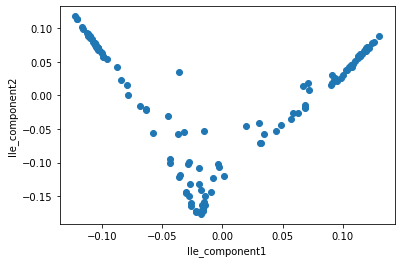

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_tn_lle_df['lle_comp1'], X_tn_lle_df['lle_comp2'], marker = 'o') # 각 피처를 요소에 넣고, 마커를 설정
plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.show()

이전에 비해 모양이 상당히 간소화된 것을 볼 수 있다. 이전에는 좌 우 측의 인접한 데이터포인트들이 저렇게 선형에 가깝게 있을 정도는 아니었다..

## 라벨 적용 LLE 데이터 시각화

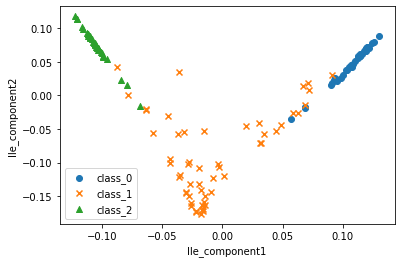

In [15]:
df = X_tn_lle_df
markers = ['o', 'x', '^']                   # 데이터 포인트 마커 지정

for i, mark in enumerate(markers):          # 클래스가 3개이기 때문에 3번 반복됨. 마커가 3개로 3번 반복된다.
    df_i = df[df['target']== i]             # 해당 클래스가 있는 데이터프레임 지정
    target_i = raw_wine.target_names[i]     # 클래스 저장
    X1 = df_i['lle_comp1']
    X2 = df_i['lle_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i)

plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.legend()                                # 범례 추가하기
plt.show()

확실히 잘 나누어져 있는 것처럼 보인다. 다음은 정확도를 보도록 한다.

# LLE 적용 전후 데이터 예측 정확도 측정

## LLE 적용 이전 데이터 학습

비교를 위해 적용 전도 데이터 학습하여 예측하여 정확도를 보도록 해야겠다.

In [16]:
# 랜덤포레스트분류기 사용

from sklearn.ensemble import RandomForestClassifier

clf_rf_std = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_std.fit(X_tn_std, y_tn)
pred_rf_std = clf_rf_std.predict(X_te_std)

### 적용 전 예측 정확도

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_std)

print(accuracy)

0.9777777777777777


## LLE 적용 이후 데이터 학습

In [18]:
# from sklearn.ensemble import RandomForestClassifier

clf_rf_lle = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_lle.fit(X_tn_lle, y_tn)
pred_rf_lle = clf_rf_lle.predict(X_te_lle)

### 적용 후 예측 정확도

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_lle)

print(accuracy)

0.9555555555555556



# confusion matrix 비교

## LLE 전

In [20]:
# LLE 적용 전

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_std)
print(conf_matrix)

[[18  0  0]
 [ 1 16  0]
 [ 0  0 10]]


## LLE 후

In [21]:
# LLE 적용 후

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_lle)
print(conf_matrix)

[[17  1  0]
 [ 1 16  0]
 [ 0  0 10]]


클래스1을 0으로 오분류한 LLE전에 더해서 클래스 0을 1로 오분류했다.

# report 비교

## LLE 전

In [22]:
# LLE 적용 전

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_std)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## LLE 후

In [23]:
# LLE 적용 후

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_lle)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.94      0.94      0.94        17
           2       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Commentary

정확히 어떤 것을(어떤 벡터 위치?)에 있는 것을 틀렸는지 알 수 있으면 재밌을텐데!

# 실험1: n_composition = 3 으로 지정했을 때

origin data volume: (133, 13)
after LLE volume: (133, 3)
Embedding Vectors : 
 [[ 1.03700769e-01  3.79714889e-02 -2.37885519e-04]
 [ 7.22262585e-02  7.64775612e-03  2.37940733e-02]
 [ 1.12912882e-01  5.93092104e-02 -5.70167406e-03]
 [ 1.15604009e-01  6.20520904e-02 -4.48270436e-03]
 [ 1.18547556e-01  6.71963261e-02 -4.95199471e-03]
 [-2.66426865e-02 -1.31811858e-01 -1.70777974e-02]
 [-1.05019210e-01  7.53765403e-02 -1.51013767e-01]
 [-1.03260811e-01  7.04731342e-02 -1.17019284e-01]
 [ 1.08112662e-01  4.68905620e-02 -1.67065962e-03]
 [-4.37782740e-02 -9.41870050e-02 -2.81165279e-02]
 [ 7.12414031e-02  1.80187418e-02  2.99753140e-02]
 [ 1.30337090e-01  8.81027598e-02 -7.23323451e-03]
 [ 2.99131083e-02 -4.06997401e-02 -7.59480163e-03]
 [-7.89866947e-02  1.49757187e-02 -2.80507803e-02]
 [ 3.47312531e-02 -5.74414731e-02  1.96180378e-02]
 [ 1.94302574e-02 -4.52951354e-02 -9.99196322e-03]
 [ 1.19596491e-01  7.00780184e-02 -6.01658994e-03]
 [-1.03173509e-01  7.11434293e-02 -1.27412545e-01]
 [-

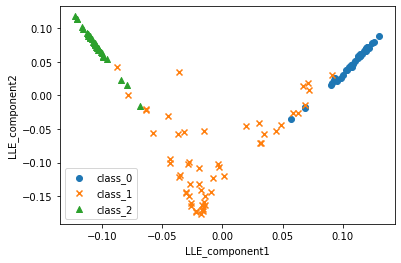

before LLE accuracy: 0.9777777777777777
after LLE accuracy: 0.9555555555555556
after LLE confusion matrix: 
 [[17  1  0]
 [ 1 16  0]
 [ 0  0 10]]
after LLE class report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.94      0.94      0.94        17
           2       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [26]:
import pandas as pd
import numpy as np

# data import
from sklearn import datasets

raw_wine = datasets.load_wine()
X = raw_wine.data
y = raw_wine.target


# train/test data split
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 1)


# data standardization
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


# lle modeling
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 3)      # LLE 모형 설정
lle.fit(X_tn_std, y_tn)                             # 트레이닝 데이터를 넣고 적합

X_tn_lle = lle.transform(X_tn_std)                  # 각각 차원축소 시킴
X_te_lle = lle.transform(X_te_std)

# data checking
print('origin data volume:', X_tn_std.shape)
print('after LLE volume:', X_tn_lle.shape)

# embedding vectors
print("Embedding Vectors : \n {}".format(lle.embedding_))

# Visualization
df = X_tn_lle_df
markers = ['o', 'x', '^']                   # 데이터 포인트 마커 지정

for i, mark in enumerate(markers):          # 클래스가 3개이기 때문에 3번 반복됨. 마커가 3개로 3번 반복된다.
    df_i = df[df['target']== i]             # 해당 클래스가 있는 데이터프레임 지정
    target_i = raw_wine.target_names[i]     # 클래스 저장
    X1 = df_i['lle_comp1']
    X2 = df_i['lle_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i)

plt.xlabel('LLE_component1')
plt.ylabel('LLE_component2')
plt.legend()                                # 범례 추가하기
plt.show()

# before lle
from sklearn.ensemble import RandomForestClassifier
clf_rf_std = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_std.fit(X_tn_std, y_tn)
pred_rf_std = clf_rf_std.predict(X_te_std)

from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_te, pred_rf_std)
print("before LLE accuracy:", accuracy1)

# after lle
clf_rf_lle = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_lle.fit(X_tn_lle, y_tn)
pred_rf_lle = clf_rf_lle.predict(X_te_lle)

accuracy2 = accuracy_score(y_te, pred_rf_lle)
print("after LLE accuracy:", accuracy2)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_lle)
print("after LLE confusion matrix: \n", conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_lle)
print("after LLE class report: \n", class_report)

 달라진게 없다. 2차원이나 3차원이나 핵심적인 정보가 다 들어가있는 것으로 생각된다. 
 
 데이터 포인트를 임베딩을 한다는 것 자체가 이미 해당 데이터의 원래 속성(? 정보?)를 다 담고있는 상태로, 다른 곳에- 다른 형태로 옮겨지는 것이라 그런가보다(아마도).
 
 # 실험2: k = 5 -> 4
 
 이번에는 k를 5에서 4로 해본다. 즉 한 덩어리로 볼 데이터 포인트를 적게 잡아서 정밀도를 올릴 수 있지 않을까 하는 생각이다.